<center><font size = "10"> Week 2 - Morphologies <center>
<center><font size = "8">Tutorial 01: create and visualize<center>

<font size = "3"><font color='blue'>Throughout this tutorial you will learn how to: 
    
<font size = "3"><font color='blue'>- build a neuron morphology step by step with NEURON 
    
<font size = "3"><font color='blue'>- load a complex neuronal morphology in NEURON
    
<font size = "3"><font color='blue'>- visualize morphologies with NeuroM

# 1. Create a neuron morphology with Neuron

 ## What is NEURON?
 
 <font size = "3"> The NEURON simulation environment is a powerful engine for performing simulations of neurons and biophysical neural networks. It allows the construction of biologically realistic membranes with active and passive ion channels, combined with virtual connectivity and electrophysiology tools to drive and measure single neurons and network behavior.
    
<font size = "3">You can take a look to the online guides and tutorials here - [NEURON](https://www.neuron.yale.edu/neuron/docs)

## What is NeuroM?
 
<font size = "3">NeuroM is a Python toolkit for the analysis and processing of neuron morphologies. 
You can find all the documentation here -[NeuroM](https://neurom.readthedocs.io/en/v1.4.17/quickstart.html)

## Neuron and NeuroM usage

### Import the neuron module into Python

<font size = "3">Any code that is not part of Python's Built-in functions must be imported. 
    

<font size = "3">The neuron.h submodule allows loading files, executing code and calling functions written in HOC, an older scripting language supported by NEURON. This allows the continued use of HOC libraries in Python code.

In [1]:
# If you are working on your own computer do: from neuron import h, gui
# The Neuron GUI will pop up on your screen

# If you are working in Noto, run this cell as it is
from neuron import h

### Create a very simple model: ball and stick model

In [2]:
soma = h.Section(name='soma')

<font size = "3">There is no output, so how can we tell we successfully created a section?

<font size = "3">NEURON’s psection( ) (short for “print (section)”) function can provide a lot of detail on sections. 

<font size = "3">Let’s validate that we have a soma and view some of its properties

In [3]:
h.psection()

soma { nseg=1  L=100  Ra=35.4
	/*location 0 attached to cell 0*/
	/* First segment only */
	insert morphology { diam=500}
	insert capacitance { cm=1}
}


1.0

<font size = "3">The results tell us the soma is a cylinder with length 100 microns, diameter 500 microns, axial resistivity 35.4 ohm*cm, and specific membrance capacitance 1  μF/c
    

<font size = "3">This is a dictionary, so we can extract any properties we want using square brackets. 

<font size = "3">For example, the lenght of a section is:

In [4]:
soma.psection()['morphology']['L']

100.0

<font size = "3">We can also probe objects with Python’s built-in "dir( )" function. Let’s see what it says about soma.

In [5]:
dir(soma)

['L',
 'Ra',
 '__call__',
 '__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'allseg',
 'arc3d',
 'cell',
 'children',
 'connect',
 'diam3d',
 'has_membrane',
 'hname',
 'hoc_internal_name',
 'insert',
 'is_pysec',
 'n3d',
 'name',
 'nseg',
 'orientation',
 'parentseg',
 'psection',
 'pt3dadd',
 'pt3dchange',
 'pt3dclear',
 'pt3dinsert',
 'pt3dremove',
 'pt3dstyle',
 'push',
 'rallbranch',
 'same',
 'spine3d',
 'trueparentseg',
 'uninsert',
 'x3d',
 'y3d',
 'z3d']

<font size = "3">This tells us all of the Python methods and variables associated with the object. 

<font size = "3">Any methods with two leading and trailing underscores ("\__\__str \____") are reserved by Python and may or may not be implemented by the object. The other items in the list are additional members of soma that we can call.

<font size = "3">To see all of the functions available to the neuron variable h, try calling "dir(h)".

<font size = "3">In addition to probing objects with "dir( )", help from docstrings is available using "help( )". For example, from "dir(soma)" we know that there is a connect method available. Let's inquire about that:

In [6]:
help(soma.connect)

Help on built-in function connect:

connect(...) method of nrn.Section instance
    childSection.connect(parentSection, [parentX], [childEnd]) or
    childSection.connect(parentSegment, [childEnd])



<font size = "3">We already have a soma ....
Let's try adding some neurites!!!


|-|       soma(0-1)
   `--|       dend(0-1)
 `----|       axon(0-1)

Wrote cell 0 to cell_01.swc


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7ff82fb14d68>)

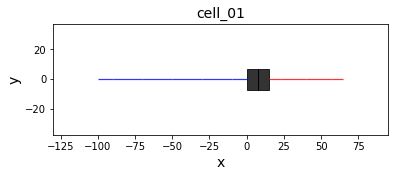

In [7]:
# Define all the sections first
dend = h.Section(name='dend')
axon = h.Section(name='axon')

# Topology
dend.connect(soma(1))
axon.connect(soma(0))

# Geometry
# Since NEURON deals with many different sections each with their own unique name, 
# we must tell NEURON which section we are working on when we want to access a section parameter. 

soma.L = soma.diam = 15    # microns
dend.L = 50                 
dend.diam = 1   
dend.nseg = 3
axon.diam = 3
axon.L = 100
axon.nseg = 5

# Translate into 3D points
h.define_shape()  

# NEURON's h.topology() function displays the topological structure of the entire model, indicating which sections 
# are connected to which sections, where they are connected, and how many segments each section is divided into.
h.topology()

# Now let's see (plot) what we have created. 
# In Noto: we need to use a package called "hoc2swc" that will save our cell in a ".swc" file. 
# This way, we will be able to visualize it using NeuroM.

import neurom as nm
from neurom import viewer
from hoc2swc import neuron2swc

# In Noto
# save hoc object into ".swc" file
neuron2swc('cell_01.swc', swap_yz=False)
# Open the ".swc" and plot with NeuroM viewer
neuron1 = nm.load_neuron('cell_01.swc')
viewer.draw(neuron1)

# In your laptop
# Visualize in the Neuron GUI
# NEURON's h.shape() function loads the topological structure of the model inside the GUI.
#s = h.Shape()
#s.show(False)
#s.color(3, sec=axon) # color section "axon" blue
#s.color(2, sec=dend) # color section "dend" red

### Create a more geometrically complex model

#### <font color='red'>PLEASE RESTART YOU KERNEL!!!!


|-|       my_soma(0-1)
   `|       main_dend(0-1)
     `|       first_branch(0-1)
     `|       second_branch(0-1)
     `|       third_branch(0-1)
 `|       my_axon(0-1)

Wrote cell 0 to cell_02.swc


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f2a74599438>)

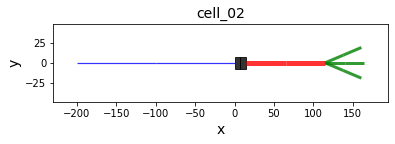

In [1]:
from neuron import h
import neurom as nm
from neurom import viewer
from hoc2swc import neuron2swc

# Defining the sections
my_soma = h.Section(name='my_soma')
main_dend = h.Section(name='main_dend')
my_axon = h.Section(name='my_axon')
first_branch = h.Section(name='first_branch')
second_branch = h.Section(name='second_branch')
third_branch = h.Section(name='third_branch')

# Geometry
my_soma.L = my_soma.diam = 15
main_dend.L = 100
main_dend.diam = 5
my_axon.L = 200
my_axon.diam = 7
first_branch.L = 50
first_branch.diam = 3
second_branch.L = 50
second_branch.diam = 3
third_branch.L = 50
third_branch.diam = 3

# Topology
main_dend.connect(my_soma(1))
my_axon.connect(my_soma(0))
first_branch.connect(main_dend(1))
second_branch.connect(main_dend(1))
third_branch.connect(main_dend(1))
h.topology()  # Check the topology

# Visualize in Noto
neuron2swc('cell_02.swc', swap_yz=False)
neuron2 = nm.load_neuron('cell_02.swc')
viewer.draw(neuron2)

# In your laptop
# Visualize in the Neuron GUI
# Show sections in different colors
#s = h.Shape()
#s.show(False)
#s.color(3, sec=my_axon) 
#s.color(2, sec=main_dend)
#s.color(5, sec=first_branch)
#s.color(5, sec=second_branch)
#s.color(5, sec=third_branch) 

### Create another neuron model example with crazy values

#### <font color='red'>PLEASE RESTART YOU KERNEL!!!!


|-|       soma(0-1)
   `|       proxApical(0-1)
     `|       apic1(0-1)
     `|       apic2(0-1)
 `|       proxBasal(0-1)
   `|       distBasal1(0-1)
   `|       distBasal2(0-1)

Wrote cell 0 to cell_03.swc


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f8a5401a898>)

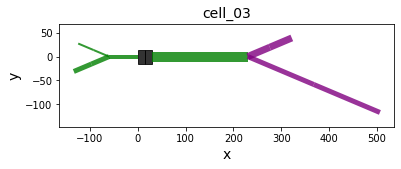

In [1]:
from neuron import h
import neurom as nm
from neurom import viewer
from hoc2swc import neuron2swc

# Instantiate the new model

# sections
soma = h.Section(name='soma')
papic = h.Section(name='proxApical')
apic1 = h.Section(name='apic1')
apic2 = h.Section(name='apic2')
pb = h.Section(name='proxBasal')
db1 = h.Section(name='distBasal1')
db2 = h.Section(name='distBasal2')

# Geometry - crazy values
soma.L = soma.diam = 30
papic.L = 200
papic.diam = 10
apic1.L = 100
apic1.diam = 7
apic2.L = 300
apic2.diam = 5
pb.L = 60
pb.diam = 4
db1.L = 80
db1.diam = 5
db2.L = 70
db2.diam = 2

# connect sections
papic.connect(soma)
pb.connect(soma(0))
apic1.connect(papic)
apic2.connect(papic)
db1.connect(pb)
db2.connect(pb)
h.topology()

# Visualize in Noto
neuron2swc('cell_03.swc', swap_yz=False)
neuron3 = nm.load_neuron('cell_03.swc')
viewer.draw(neuron3)

# In your laptop
# Visualize in the Neuron GUI
# Show sections in different colors
#s.show(False)
#s.color(1, sec=papic) 
#s.color(2, sec=pb)
#s.color(3, sec=apic1)
#s.color(3, sec=apic2)
#s.color(4, sec=db1) 
#s.color(4, sec=db2) 
#s = h.Shape()

### Using for-loops to create more complex morphologies

#### <font color='red'>PLEASE RESTART YOU KERNEL!!!!


|----------|       soma(0-1)
            `---------|       dend1(0-1)
                       `---------|       dend_branch1(0-1)
                       `---------|       dend_branch2(0-1)
 `---------|       axon(0-1)

Wrote cell 0 to cell_04.swc


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f8dcf6765f8>)

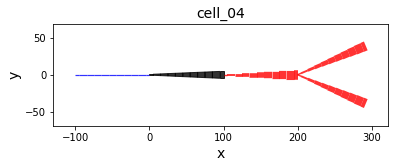

In [3]:
from neuron import h
import neurom as nm
from neurom import viewer
from hoc2swc import neuron2swc
import numpy

# Pro tip: the same thing can also be done by using a list comprehension!!
# A list comprehension is conceptually the same as a for loop
soma, dend1, db1, db2, axon = [h.Section(name=n) for n in ['soma', 'dend1', 'dend_branch1', 'dend_branch2', 'axon']]

# Geometry 
for sec in h.allsec():
    sec.nseg = 10
    sec.L = 100
    for seg in sec:
        seg.diam = numpy.interp(seg.x, [0, 1], [1, 10])

# connect sections
dend1.connect(soma(1))
db1.connect(dend1(1),0)
db2.connect(dend1)
axon.connect(soma(0))
h.topology()

# Visualize in Noto
neuron2swc('cell_04.swc', swap_yz=False)
neuron4 = nm.load_neuron('cell_04.swc')
viewer.draw(neuron4)

# In your laptop
# Visualize in the Neuron GUI
#s.show(False)
#s = h.Shape()

### Create a neuron class

#### <font color='red'>PLEASE RESTART YOU KERNEL!!!!


|-|       BallAndStick[0].soma(0-1)
   `|       BallAndStick[0].dend(0-1)

Wrote cell 0 to cell_05.swc


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f75447dc908>)

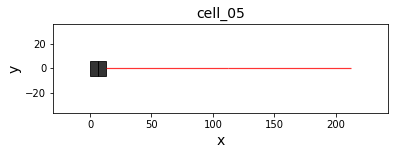

In [1]:
from neuron import h
import neurom as nm
from neurom import viewer
from hoc2swc import neuron2swc
import numpy

class BallAndStick:
    def __init__(self, gid):
        self._gid = gid
        self.soma = h.Section(name='soma', cell=self)
        self.dend = h.Section(name='dend', cell=self)
        self.dend.connect(self.soma)
        self.soma.L = self.soma.diam = 12.6157 # If you're wondering why that number was chosen 
                                               # for the soma, it's because it makes the surface area 
                                               # (which doesn't include end faces) approximately 500 μm2:
        self.dend.L = 200
        self.dend.diam = 1
    def __str__(self):
        return 'BallAndStick[{}]'.format(self._gid)

my_cell = BallAndStick(0)
h.topology()

# Visualize in Noto
neuron2swc('cell_05.swc', swap_yz=False)
neuron5 = nm.load_neuron('cell_05.swc')
viewer.draw(neuron5)

# 2. Load and visualize real neuronal morphologies

<font size = "3">You should change the following paths to the ones in which you have saved the files.

In [2]:
# Here are the paths to morphology files

path_to_file = 'good_morph.asc'
nrn = path_to_file

<font size = "3"> First, we can check what is inside the file.

In [3]:
import neurom as nm

# Compatible file formats for morphology could be: ascii, swc, hdf5.
# Before plotting, let's see what is inside the morphology file.
neuron = nm.load_neuron(nrn)
print(neuron.name)

neurites = neuron.neurites
#print(neurites)       # Uncomment this if you want to know what are you going to iterate through.

# "enumerate()" returns the number of the list item and the object itself
# e.g. (1, neurite1), (2, neurite2), etc.
for i, neurite in enumerate(neurites):
    
    # "iter_sections()" is an iterator. It returns the values one by one every time it is called
    # therefore by applying the list function we force to return all the values.
    number_of_sections = len(list(neurite.iter_sections()))
    
    # "points" is a numpy array, where instead of len, shape is used
    # first element is the number of points, second the number of coordinates and a radius (4)
    number_of_points = neurite.points.shape[0]

    # strings to use for printing ("\n" = change line)
    string_neurite = "Neurite {0}:\n".format(i)
    string_type    = "Type: {0}\n".format(neurite.type)
    string_n_secs  = "Number of Sections: {0}\n".format(number_of_sections)
    string_n_pnts  = "Number of Points: {0}\n".format(number_of_points)
    
    # "join()" concatenates strings in a list by linking them with the provided string (here a tab identation "\t")
    print("\t".join((string_neurite, string_type, string_n_secs, string_n_pnts)))



good_morph
Neurite 0:
	Type: NeuriteType.axon
	Number of Sections: 101
	Number of Points: 1385

Neurite 1:
	Type: NeuriteType.basal_dendrite
	Number of Sections: 13
	Number of Points: 141

Neurite 2:
	Type: NeuriteType.basal_dendrite
	Number of Sections: 21
	Number of Points: 264

Neurite 3:
	Type: NeuriteType.basal_dendrite
	Number of Sections: 13
	Number of Points: 182

Neurite 4:
	Type: NeuriteType.basal_dendrite
	Number of Sections: 5
	Number of Points: 134

Neurite 5:
	Type: NeuriteType.basal_dendrite
	Number of Sections: 13
	Number of Points: 244

Neurite 6:
	Type: NeuriteType.basal_dendrite
	Number of Sections: 1
	Number of Points: 44

Neurite 7:
	Type: NeuriteType.basal_dendrite
	Number of Sections: 3
	Number of Points: 32

Neurite 8:
	Type: NeuriteType.apical_dendrite
	Number of Sections: 116
	Number of Points: 1880



/usr/local/lib/python3.6/dist-packages/neurom/io/neurolucida.py:266: UserWarning: This is an experimental reader. There are no guarantees regarding ability to parse Neurolucida .asc files or correctness of output.
  warnings.warn('This is an experimental reader. '


<font size = "3">Second, we can visualize the real morphological reconstruction using "neurom viewer".
<font size = "3"> We will plot three different graps: the morphology on its 'xy' plane, the soma and the different neurites.

In [4]:
# Let's check what "viewer" can do for us
from neurom import viewer

help(viewer.draw)

Help on function draw in module neurom.viewer:

draw(obj, mode='2d', **kwargs)
    Draw a morphology object
    
    Parameters:
        obj: morphology object to be drawn (neuron, tree, soma).
        mode (Optional[str]): drawing mode ('2d', '3d', 'dendrogram'). Defaults to '2d'.
        **kwargs: keyword arguments for underlying neurom.view.view functions.
    
    Raises:
        InvalidDrawModeError if mode is not valid
        NotDrawableError if obj is not drawable
        NotDrawableError if obj type and mode combination is not drawable
    
    Examples:
    
        >>> nrn = ... # load a neuron
        >>> fig, _ = viewer.draw(nrn)             # 2d plot
        >>> fig.show()
        >>> fig3d, _ = viewer.draw(nrn, mode='3d') # 3d plot
        >>> fig3d.show()
        >>> fig, _ = viewer.draw(nrn.neurites[0]) # 2d plot of neurite tree
        >>> dend, _ = viewer.draw(nrn, mode='dendrogram')



Text(0, 0.5, 'micrometers (um)')

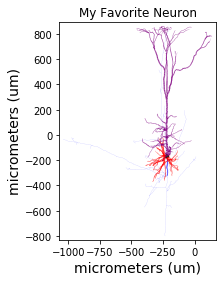

In [5]:
from neurom.view import view
from neurom.view.common import update_plot_limits
import matplotlib.pyplot as plt

## PLOT 1
# Plot the morphology on a specific plane
# planes: 'xy', 'xz', 'yz'
figure, axis = viewer.draw(neuron, mode='2d', plane='xy')

# The axis handler is returend for further customization
axis.set_title('My Favorite Neuron')
axis.set_xlabel('micrometers (um)')
axis.set_ylabel('micrometers (um)')

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f74f56b5550>)

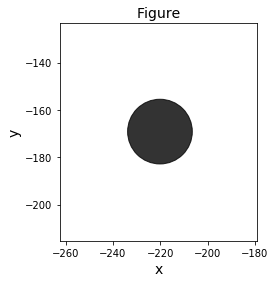

In [6]:
## PLOT 2
# Plot only the soma
viewer.draw(neuron.soma, plane='xy')

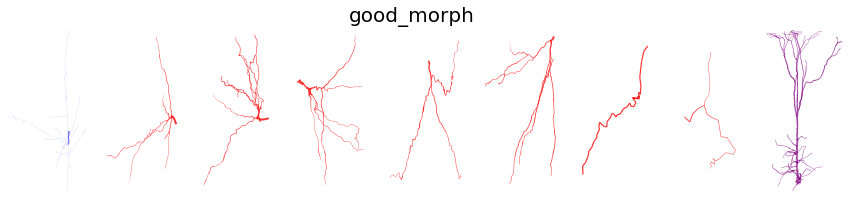

In [7]:
## PLOT 3
# Plot each of the neurites separately
N = len(neurites)

# Create N subplots, one for each neurite
f, axes = plt.subplots(1, N, figsize=(15, 3)) # figsize in inches (width, height)

for i, neurite in enumerate(neurites):
    current_axes = axes[i]    
    # draw the neurite in the i-th subplot
    # new_fig set to False will prevent the creation of a new figure
    # every time the function is called, the one that we created above will be used instead
    view.plot_tree(current_axes, neurite, plane='xy')
    update_plot_limits(current_axes, white_space=10)
    # remove the xy axes for a prettier result
    current_axes.axis('off')

    # remove the title for each subplot
    current_axes.set_title('')

# set a global title for the figure
f.suptitle(neuron.name, fontsize=20)
plt.show()